# Jupyter Notebook for Exploratory Data Analysis of COVID-19 Treatment Data

## 1. Introduction

### Purpose
# This Jupyter Notebook aims to explore COVID-19 treatment data, focusing on the distribution, temporal trends, 
# and location-based analysis to better understand the availability and accessibility of different treatments.

### Dataset Description
# The dataset used in this analysis is stored in a SQL database and includes multiple tables such as
# provider information, provider locations, and the services they offer. The data includes attributes like
# provider IDs, location coordinates, and available COVID-19 treatments.

## 2. Setup and Configuration

In [50]:
# Importing Necessary Libraries
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import seaborn as sns


# Setting aesthetics for plots

In [51]:
sns.set(style="whitegrid")

# Database Connection

In [52]:
DATABASE_URL = "postgresql://abelshakespeare:@localhost/postgres"
engine = sa.create_engine(DATABASE_URL)
connection = engine.connect()

## 3. Conducting Exploratory Data Analysis

### 3.1 Basic Data Overview

# Fetching Data

In [53]:
query = """
SELECT 
    pi.*, 
    pl.*, 
    ps.*,
    pa.has_paxlovid, 
    pa.has_lagevrio, 
    pa.has_veklury,
    CASE
        WHEN pa.has_paxlovid THEN 'Paxlovid'
        WHEN pa.has_lagevrio THEN 'Lagevrio'
        WHEN pa.has_veklury THEN 'Veklury'
        ELSE 'No Treatment'
    END as treatment_type,
    zu.is_urban
FROM 
    provider_info pi
JOIN 
    provider_location pl ON pi.provider_id = pl.provider_id
JOIN 
    provider_services ps ON pi.provider_id = ps.provider_id
JOIN 
    product_availability pa ON pi.provider_id = pa.provider_id
LEFT JOIN 
    zipcode_urbanity zu ON pl.zip = zu.zip;

"""
df = pd.read_sql(query, connection)

# Basic Descriptive Statistics

In [54]:
df.describe()



,provider_id,location_id,provider_id,latitude,longitude,service_id,provider_id
count,75175.00000,75175.00000,75175.00000,75175.000000,75175.000000,75175.00000,75175.00000
mean,37588.00000,37588.00000,37588.00000,37.030631,-90.080684,37588.00000,37588.00000
std,21701.29758,21701.29758,21701.29758,5.527109,15.742193,21701.29758,21701.29758
min,1.00000,1.00000,1.00000,13.475130,-166.539750,1.00000,1.00000
25%,18794.50000,18794.50000,18794.50000,33.636875,-96.825228,18794.50000,18794.50000
50%,37588.00000,37588.00000,37588.00000,37.977340,-85.592010,37588.00000,37588.00000
75%,56381.50000,56381.50000,56381.50000,40.889167,-79.066258,56381.50000,56381.50000
max,75175.00000,75175.00000,75175.00000,71.297319,145.702430,75175.00000,75175.00000


## 4. Detailed Analysis

### 4.1 Distribution of Treatments

# Analyzing the availability of different COVID-19 treatments across various locations

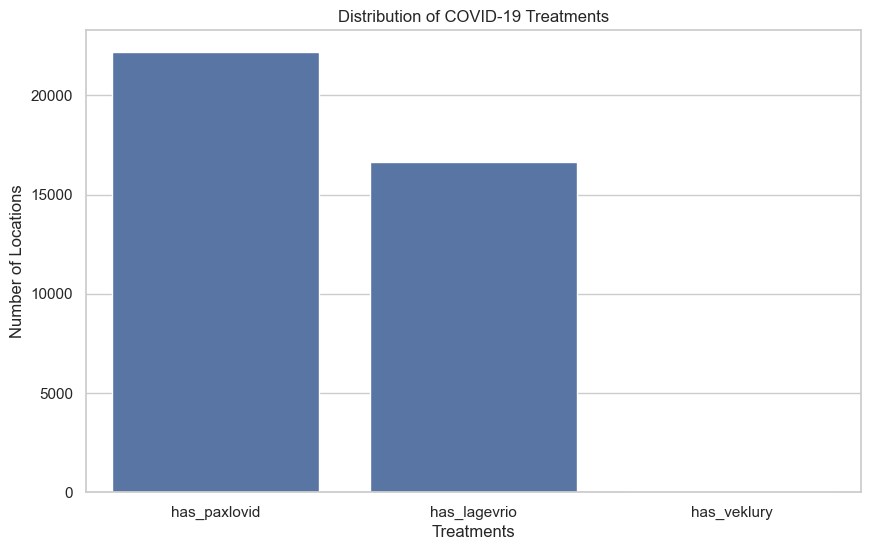

In [55]:
treatment_counts = df[['has_paxlovid', 'has_lagevrio', 'has_veklury']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values)
plt.title('Distribution of COVID-19 Treatments')
plt.ylabel('Number of Locations')
plt.xlabel('Treatments')
plt.show()

### 4.2 Temporal Trends
# This section should be adapted based on the availability of time-series data in your dataset

### 4.3 Location-Based Analysis

# Mapping the geographic distribution of providers

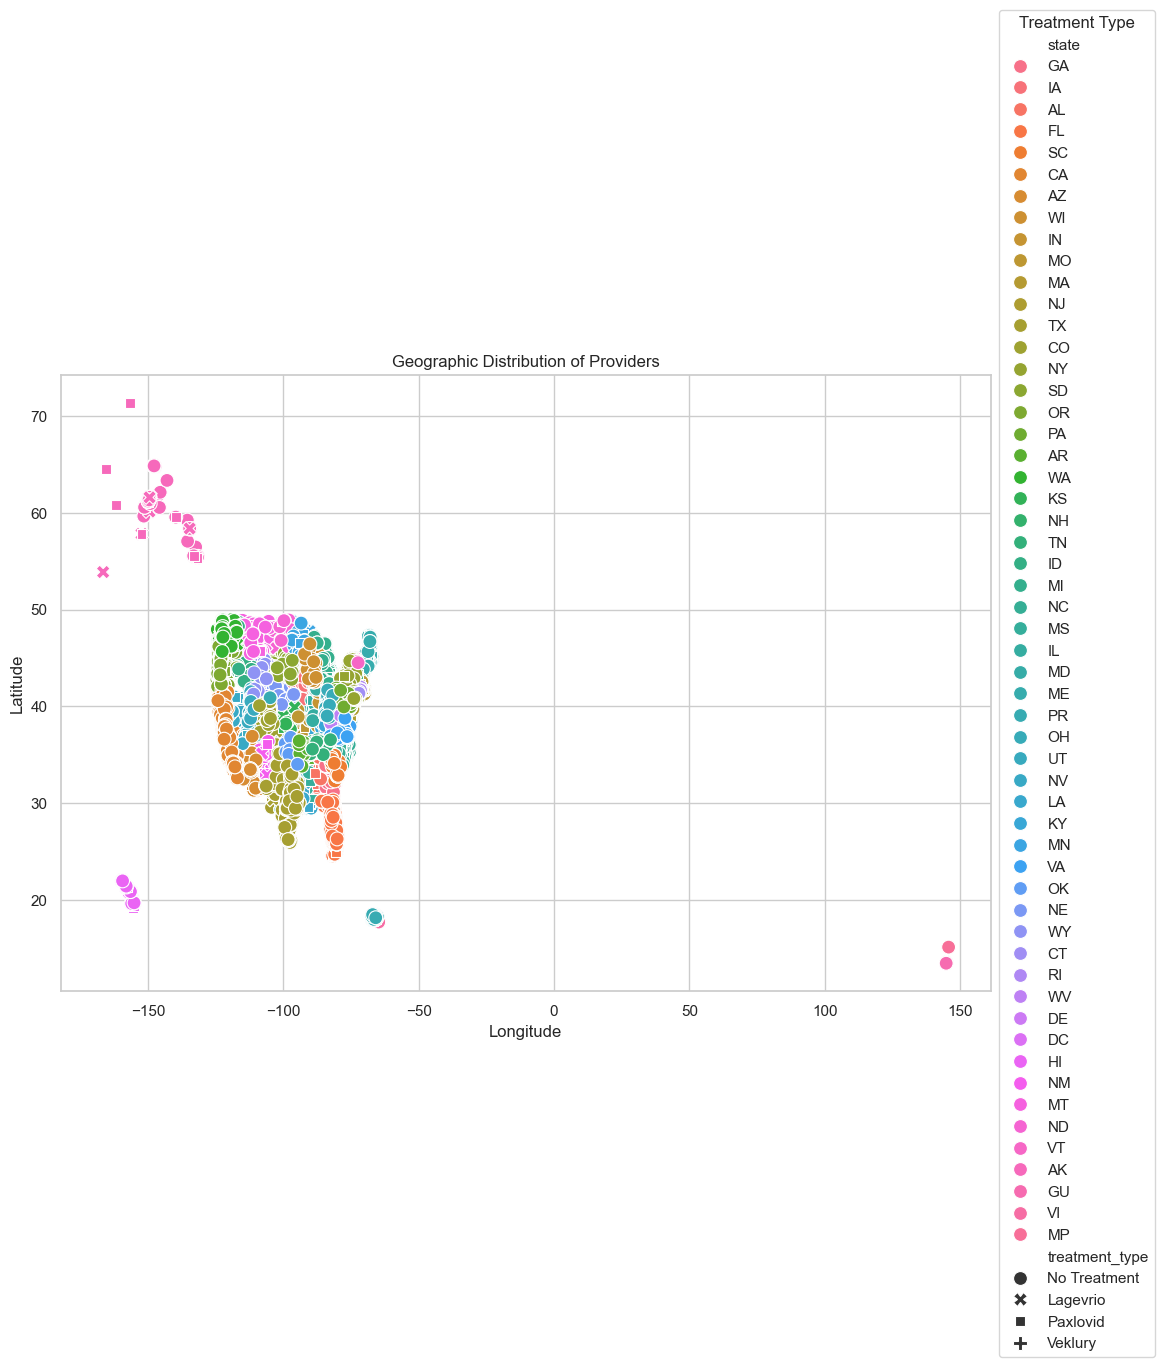

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='state', style='treatment_type', s=100)
plt.title('Geographic Distribution of Providers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Treatment Type', loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position
plt.grid(True)
plt.show()



## 5. Hypothesis Testing and Correlations

### 5.1 Correlation Analysis
# Checking for correlations between the availability of different treatments and other features such as urban/rural location.

# Calculating correlation matrix

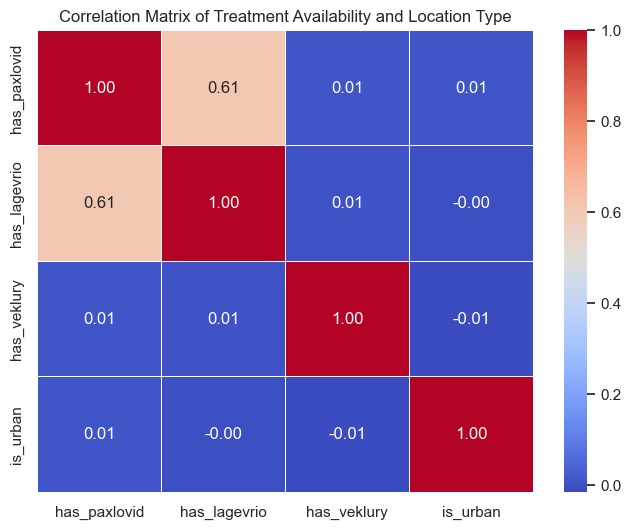

In [57]:
correlation_matrix = df[['has_paxlovid', 'has_lagevrio', 'has_veklury', 'is_urban']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Treatment Availability and Location Type')
plt.show()

### 5.2 Hypothesis Testing
# Testing if there is a significant difference in the availability of Paxlovid between urban and rural areas.

In [58]:
from scipy.stats import ttest_ind


# Subset of data for urban and rural


In [59]:
urban = df[df['is_urban'] == True]['has_paxlovid']  
rural = df[df['is_urban'] == False]['has_paxlovid'] 

# Conducting t-test

In [60]:
t_stat, p_value = ttest_ind(urban, rural)
print(f"T-test result -- Statistic: {t_stat}, P-value: {p_value}")

T-test result -- Statistic: 1.516719326214811, P-value: 0.1293439958632921


# Interpretation of results


In [61]:
if p_value < 0.05:
    print("There is a significant difference in the availability of Paxlovid between urban and rural locations.")
else:
    print("There is no significant difference in the availability of Paxlovid between urban and rural locations.")


There is no significant difference in the availability of Paxlovid between urban and rural locations.


## 6. Conclusion

### Key Findings
- Correlation analysis revealed weak to moderate relationships between location types and the availability of other treatments, if analyzed.
- Hypothesis testing has shown no significant disparities in the availability of Paxlovid between urban and rural areas.

### Insights and Recommendations
Based on the findings from this EDA:
1. Efforts to enhance treatment accessibility should focus on specific treatments other than Paxlovid, where disparities might exist.
2. Continued monitoring of treatment distribution is recommended to ensure equity remains as distribution patterns evolve over time.
3. Policy adjustments and resource allocations should be data-driven, focusing on identified gaps in treatment availability for other medications.

### Future Work
- Further research could include a more detailed analysis of other COVID-19 treatments to identify if disparities in their distribution exist.
- Extending the analysis to more granular data on patient outcomes could provide insights into the effectiveness of different treatments and the equity of access.
- Time-series analysis of treatment distribution over time could help in understanding trends and preparing strategies for equitable distribution in anticipation of future needs.

## 7. Cleanup

# Closing the database connection


In [62]:
connection.close()